# Forecasting - BTC

In [1]:
#!pip install python-dotenv
#!pip install pmdarima
#!pip install arch
#!pip install tslearn

1) Imports

In [2]:
import warnings
import requests
import json
import pandas as pd
from datetime import datetime, date
warnings.filterwarnings("ignore")
from ts_utils_final import *
from pytictoc import TicToc

Importing plotly failed. Interactive plots will not work.


2) Coleta de dados

In [3]:
hj = date.today()
t = TicToc()
# futuro_day = date.fromordinal(hj.toordinal()+5) # hoje + 30 dias
# print("Data Limite Previsão",futuro_day)

In [4]:
t.tic()
# Pegando dados da Api
#dtf = get_data('btc', sample_data=True)
dtf = get_data_df('BTC',20)
dtf_poly = dtf
# Convertendo timestamp para data
DS = []
for result in dtf['time']:
    DS.append(str(datetime.fromtimestamp(result).date()))
dtf = pd.DataFrame([DS, dtf['close']]).T
dtf.columns = ['date', 'close']
dtf["date"] = pd.to_datetime(dtf['date'], format='%Y-%m-%d')
dtf.close = dtf.close.astype(float)
dtf.head()
t.toc()

Buscando dados de :  2021-04-01 06:00:00
Buscando dados de :  2021-01-07 22:00:00
Buscando dados de :  2020-10-16 14:00:00
Buscando dados de :  2020-07-25 06:00:00
Buscando dados de :  2020-05-02 22:00:00
Buscando dados de :  2020-02-09 14:00:00
Buscando dados de :  2019-11-18 06:00:00
Buscando dados de :  2019-08-26 22:00:00
Buscando dados de :  2019-06-04 14:00:00
Buscando dados de :  2019-03-13 06:00:00
Buscando dados de :  2018-12-19 22:00:00
Buscando dados de :  2018-09-27 14:00:00
Buscando dados de :  2018-07-06 06:00:00
Buscando dados de :  2018-04-13 22:00:00
Buscando dados de :  2018-01-20 14:00:00
Buscando dados de :  2017-10-29 06:00:00
Buscando dados de :  2017-08-06 22:00:00
Buscando dados de :  2017-05-15 14:00:00
Buscando dados de :  2017-02-21 06:00:00
Elapsed time is 24.450125 seconds.


In [5]:
t.tic()
ts = dtf.groupby("date")["close"].median().rename("sales")
ts = ts[:-5]
ts.tail()
t.toc()

Elapsed time is 0.004401 seconds.


3) Analise de séries temporais

Valor maximo: $ 63501.630000000005
Valor minimo: $ 732.19


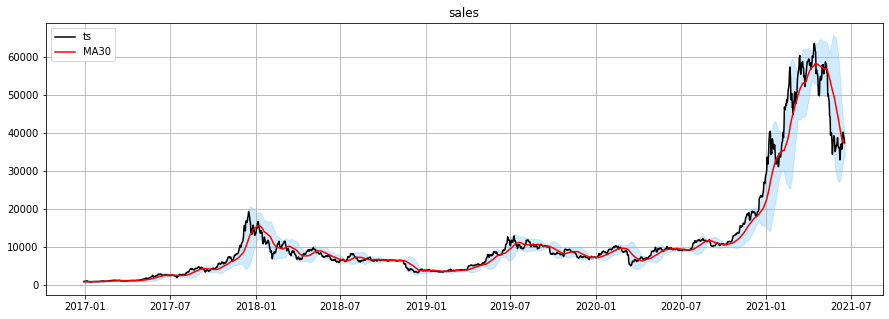

Elapsed time is 0.247106 seconds.


In [6]:
t.tic()
print("Valor maximo: $",max(ts))
print("Valor minimo: $",min(ts))
w = 30
plot_ts(ts, plot_ma=True, plot_intervals=True, window=w, figsize=(15,5))
t.toc()

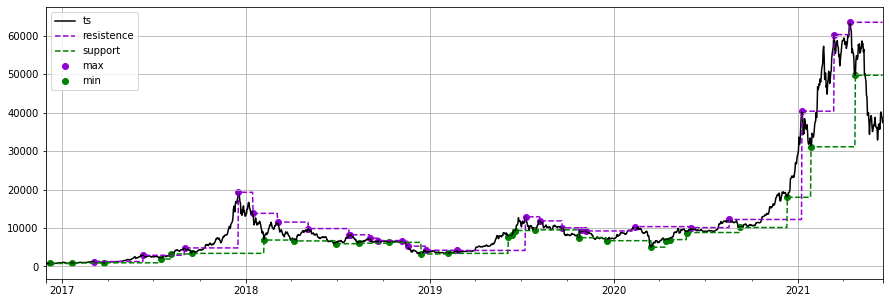

Elapsed time is 0.593811 seconds.


In [7]:
t.tic()
# Analise de maximos e minimos
res_sup = resistence_support(ts, window=30, trend=False, plot=True, figsize=(15,5))
t.toc()

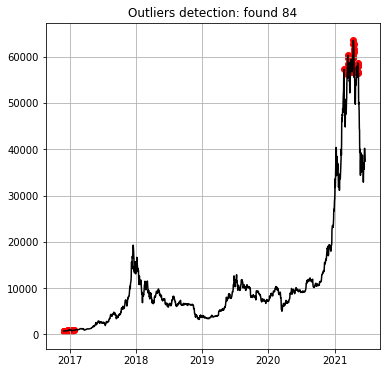

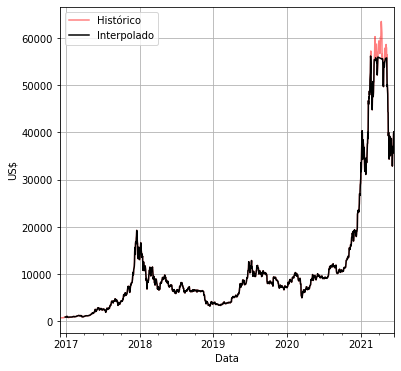

Elapsed time is 0.569394 seconds.


In [8]:
t.tic()
#Removendo outliers
dtf_outliers = find_outliers(ts, perc=0.05, figsize=(6,6))
ts_clean = remove_outliers(ts, outliers_idx=dtf_outliers[dtf_outliers["outlier"]==1].index, figsize=(6,6))
ts = ts_clean.replace(np.nan, ts_clean.median())
t.toc()

4) Processamento

--- splitting at index:  1646 | 2021-06-02 00:00:00 | test size: 0.01  ---


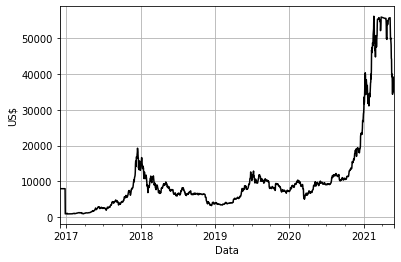

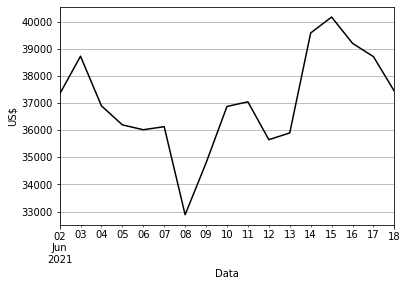

train: 1646 obs  |  test: 17 obs
Elapsed time is 0.658451 seconds.


In [9]:
t.tic()
ts_train, ts_test = split_train_test(ts, exog=None, test=0.01, plot=True, figsize=(6,6))
print("train:", len(ts_train), "obs  |  test:", len(ts_test), "obs")
t.toc()

5) Regressão Linear

              x      forecast
0    2016-11-29  -2793.705509
1    2016-11-30  -2776.638104
2    2016-12-01  -2759.570698
3    2016-12-02  -2742.503293
4    2016-12-03  -2725.435887
...         ...           ...
1658 2021-06-14  25504.052902
1659 2021-06-15  25521.120307
1660 2021-06-16  25538.187713
1661 2021-06-17  25555.255118
1662 2021-06-18  25572.322524

[1663 rows x 2 columns]


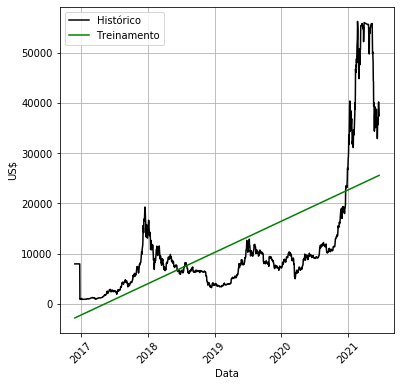

Figura Salva!


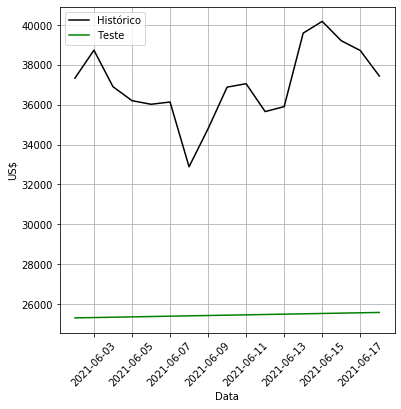

Figura Salva!
Results by manual calculation: Treinamento
MAPE:86.3172 %
MAE:7003.8125
MSE:92101161.4036
RMSE:9596.9350
Results by manual calculation Teste:
MAPE:31.1631 %
MAE:11601.8405
MSE:137742511.6750
RMSE:11736.3756
Elapsed time is 0.648863 seconds.


In [10]:
t.tic()
fit_poly(ts_train, ts_test, degree=1, plot=True, figsize=(6,6))
t.toc()

6) Regressão Polinomial

              x      forecast
0    2016-11-29  10109.684185
1    2016-11-30   9789.159283
2    2016-12-01   9481.248833
3    2016-12-02   9185.209854
4    2016-12-03   8900.342562
...         ...           ...
1658 2021-06-14  36755.790773
1659 2021-06-15  37753.476299
1660 2021-06-16  38971.481310
1661 2021-06-17  40430.730386
1662 2021-06-18  42153.998073

[1663 rows x 2 columns]


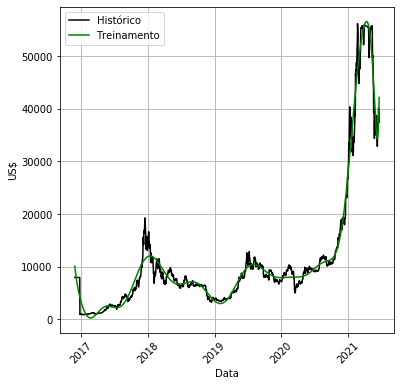

Figura Salva!


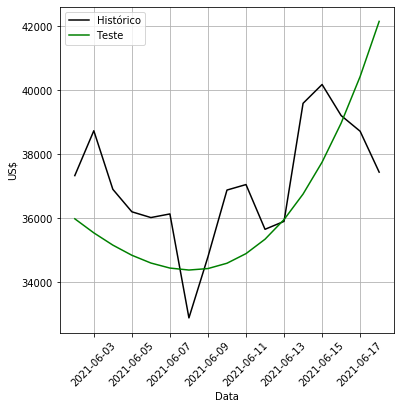

Figura Salva!
Results by manual calculation: Treinamento
MAPE:16.4545 %
MAE:1074.5755
MSE:2535713.8364
RMSE:1592.3925
Results by manual calculation Teste:
MAPE:4.6150 %
MAE:1727.3096
MSE:4311295.5517
RMSE:2076.3659
Elapsed time is 0.764389 seconds.


In [11]:
t.tic()
fit_poly(ts_train, ts_test, degree=32, plot=True, figsize=(6,6))
t.toc()

7) Arima

/home/tulio_w_caproni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/tulio_w_caproni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/tulio_w_caproni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/tulio_w_caproni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/tulio_w_caproni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was pr

/home/tulio_w_caproni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/tulio_w_caproni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/tulio_w_caproni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/tulio_w_caproni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/tulio_w_caproni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was pr

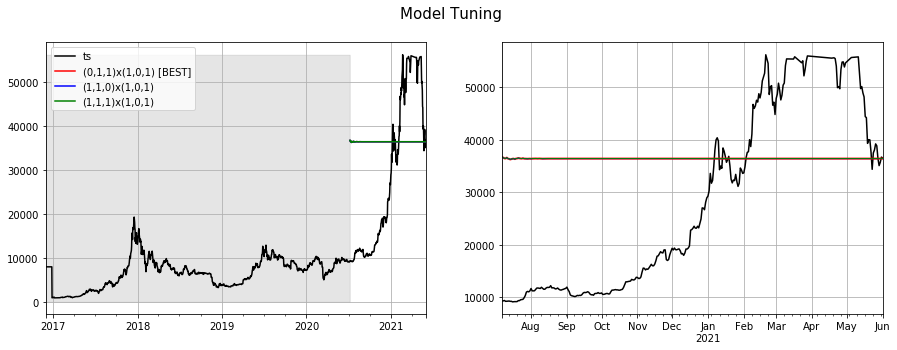

Elapsed time is 16.344503 seconds.


In [12]:
t.tic()
# *pode demorar
s=7
res = tune_arima_model(ts_train, s=s, val_size=0.2, max_order=(1,1,1), seasonal_order=(1,0,1),
                        scoring=metrics.mean_absolute_error, top=3, figsize=(15,5))
res.head()
t.toc()

In [13]:
t.tic()
# *pode demorar
find_best_sarimax(ts_train, seasonal=True, stationary=False, s=s, exog=None,
                  max_p=10, max_d=3, max_q=10, 
                  max_P=1, max_D=1, max_Q=1)
t.toc()

/home/tulio_w_caproni/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/tulio_w_caproni/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/tulio_w_caproni/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/tulio_w_caproni/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/tulio_w_caproni/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWa

best model --> (p, d, q): (4, 1, 2)  and  (P, D, Q, s): (1, 0, 1, 7)
Elapsed time is 96.235013 seconds.


Trend parameters: d=1
Seasonal parameters: Seasonality every 7 observations
Exog parameters: Not given


/home/tulio_w_caproni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/tulio_w_caproni/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


        date       ts
0 2016-11-29  7962.01
1 2016-11-30  7962.01
2 2016-12-01  7962.01
3 2016-12-02  7962.01
4 2016-12-03  7962.01
        date        model
0 2016-11-29     0.000000
1 2016-11-30  8898.284458
2 2016-12-01  7998.789229
3 2016-12-02  7963.477468
4 2016-12-03  7962.068552


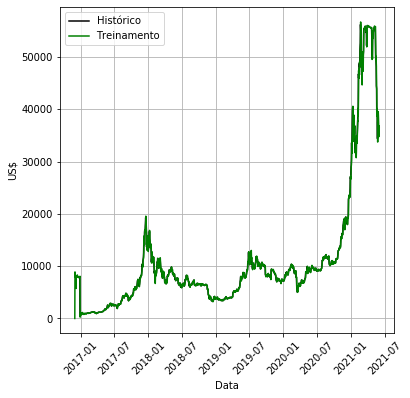


Figura Salva!



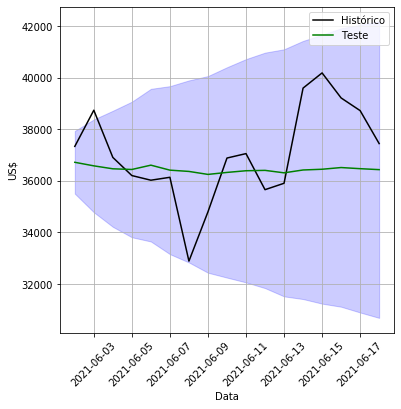


Figura Salva!

Training --> Residuals mean: 20.0  | std: 651.0  | mae: 278.0  | mape: 3.0 %  | mse: 424093.0  | rmse: 651.0
Test --> Error mean: 596.0  | std: 1816.0  | mae: 1440.0  | mape: 4.0 %  | mse: 3457318.0  | rmse: 1859.0
Elapsed time is 1.284187 seconds.


In [14]:
t.tic()
# Traino/Test
dtf, model = fit_sarimax(ts_train, ts_test, order=(1,1,1), seasonal_order=(1,0,1), s=s, conf=0.95, figsize=(6,6))
t.toc()

In [15]:
# t.tic()
# # previsão
# model = smt.SARIMAX(ts, order=(1,1,1), seasonal_order=(1,0,1,s), exog=None).fit()

# future = forecast_autoregressive(ts, model, end=futuro_day, conf=0.95, zoom=30, figsize=(6,6))
# t.toc()

8) Prophet

In [16]:
t.tic()
# Crie dataframe com colunas 'ds' (datas), 'y' (valores), 'cap' (capacidade de crescimento = "logística")
dtf_train = ts_train.reset_index().rename(columns={"date":"ds", "sales":"y"})
dtf_test = ts_test.reset_index().rename(columns={"date":"ds", "sales":"y"})

dtf_train.tail()
t.toc()

Elapsed time is 0.004382 seconds.


In [17]:
t.tic()
# Crie feriados dataFrame com as colunas 'ds' (datas) e 'feriado' (string ex 'xmas')
dtf_holidays = None
model = Prophet(growth="linear", changepoints=None, n_changepoints=25, seasonality_mode="multiplicative",
                yearly_seasonality="auto", weekly_seasonality="auto", daily_seasonality=False,
                holidays=dtf_holidays, interval_width=0.80)
t.toc()

Elapsed time is 1.248131 seconds.


          ds       ts
0 2016-11-29  7962.01
1 2016-11-30  7962.01
2 2016-12-01  7962.01
3 2016-12-02  7962.01
4 2016-12-03  7962.01
          ds        model
0 2016-11-29  6360.985706
1 2016-11-30  6305.192604
2 2016-12-01  6217.633244
3 2016-12-02  6114.984510
4 2016-12-03  6073.342404


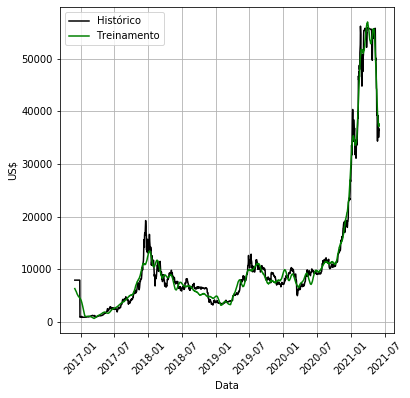


Figura Salva!



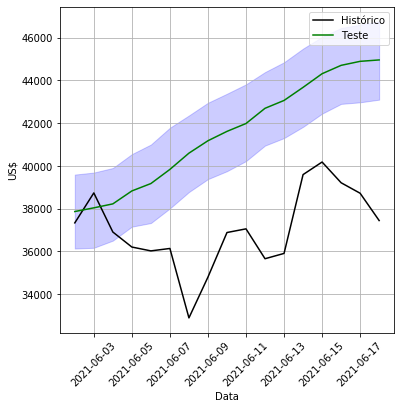


Figura Salva!

Training --> Residuals mean: 48.0  | std: 1383.0  | mae: 988.0  | mape: 16.0 %  | mse: 1915103.0  | rmse: 1384.0
Test --> Error mean: -4471.0  | std: 2497.0  | mae: 4553.0  | mape: 12.0 %  | mse: 25855239.0  | rmse: 5085.0
Elapsed time is 6.113933 seconds.


In [18]:
t.tic()
dtf, model = fit_prophet(dtf_train, dtf_test, model=model, freq="D", figsize=(6,6))
t.toc()

In [19]:
# t.tic()
# dtf = ts.reset_index().rename(columns={"date":"ds", "sales":"y"})
# dtf.tail()
# t.toc()

In [20]:
# t.tic()
# model = Prophet(growth="linear", changepoints=None, n_changepoints=25, seasonality_mode="multiplicative",
#                 yearly_seasonality="auto", weekly_seasonality="auto", daily_seasonality=False,
#                 holidays=dtf_holidays, interval_width=0.80)
# t.toc()

In [21]:
# t.tic()
# future = forecast_prophet(dtf, model, end=futuro_day, freq="D", zoom=30, figsize=(6,6))
# t.toc()

9) LSTM

In [22]:
t.tic()
s = 120
n_features = 1
model = models.Sequential()
model.add( layers.LSTM(input_shape=(s,n_features), units=50, activation='relu', return_sequences=True) )
model.add( layers.Dropout(0.2) )
model.add( layers.LSTM(units=50, activation='relu', return_sequences=False) )
model.add( layers.Dense(1) )
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()
t.toc()

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 120, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 120, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
Elapsed time is 0.704833 seconds.


Seasonality: using the last 120 observations to predict the next 1
--- X: (1526, 120, 1) | y: (1526,) ---
Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use tf.cast instead.


--- computing confidence interval ---
        date       ts
0 2016-11-29  7962.01
1 2016-11-30  7962.01
2 2016-12-01  7962.01
3 2016-12-02  7962.01
4 2016-12-03  7962.01
        date        model
0 2016-11-29  1824.796265
1 2016-11-30  1824.796265
2 2016-12-01  1824.796265
3 2016-12-02  1824.796265
4 2016-12-03  1824.796265


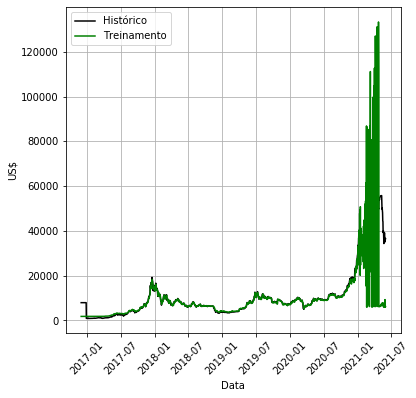


Figura Salva!



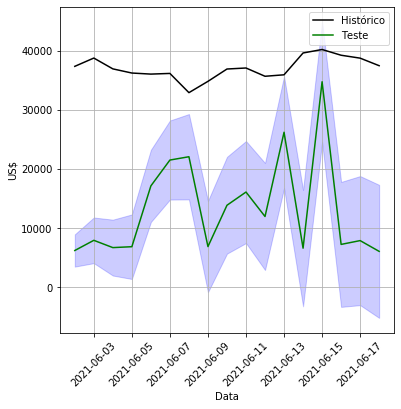


Figura Salva!

Training --> Residuals mean: 1351.0  | std: 10913.0  | mae: 3273.0  | mape: 17.0 %  | mse: 120843560.0  | rmse: 10993.0
Test --> Error mean: 23769.0  | std: 8915.0  | mae: 23769.0  | mape: 64.0 %  | mse: 639738241.0  | rmse: 25293.0
Elapsed time is 29706.328002 seconds.


In [23]:
t.tic()
dtf, model = fit_lstm(ts_train, ts_test, model, exog=None, s=s, epochs=100, conf=0.20, figsize=(6,6))
t.toc()

In [24]:
# t.tic()
# future = forecast_lstm(ts, model, conf=0.20, end=futuro_day, freq="D", zoom=30, figsize=(6,6))
# t.toc()